In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Thống kê

In [3]:
# đọc file data
df=pd.read_csv('data_10000.csv')
df = df.drop("link", axis=1)
df.head()


,title,author,language,avg_ratings,ratings_count,reviews_count,publisher,publish_year,num_pages,page_format,genres
0,The Hunger Games,Suzanne Collins,English,4.33,7971601,196977,Scholastic Press,2008.0,374.0,Hardcover,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas..."
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,English,4.50,3150618,57202,Scholastic Inc.,2004.0,912.0,Paperback,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
2,Pride and Prejudice,Jane Austen,English,4.28,3948185,100606,Modern Library,2000.0,279.0,Paperback,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,To Kill a Mockingbird,Harper Lee,English,4.27,5696477,110338,Harper Perennial Modern Classics,2006.0,323.0,Paperback,"['Classics', 'Fiction', 'Historical Fiction', ..."
4,The Book Thief,Markus Zusak,English,4.39,2367106,136148,Alfred A. Knopf,2006.0,552.0,Hardcover,"['Historical Fiction', 'Fiction', 'Young Adult..."


### Missing data

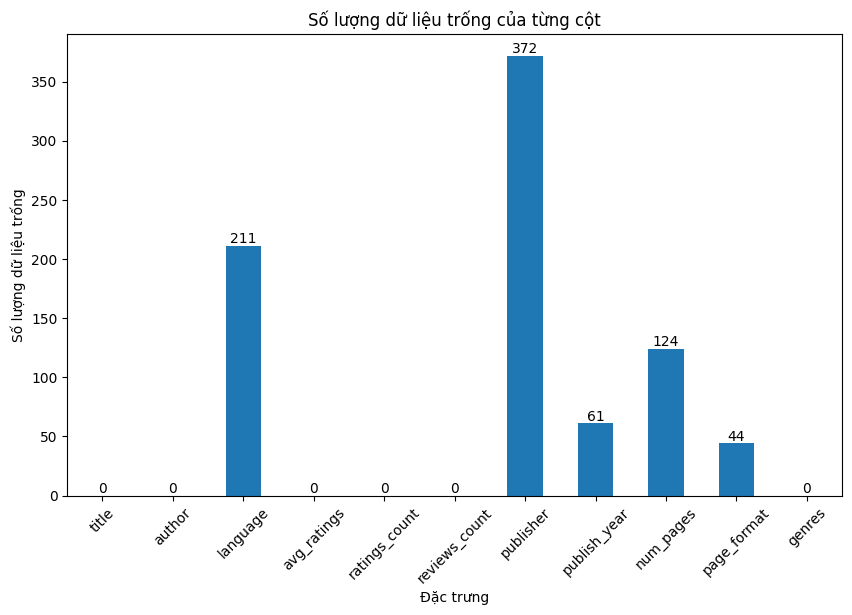

In [4]:
# Tạo một series chứa số lượng dữ liệu trống của từng cột
missing_data = df.isnull().sum()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar')
plt.title('Số lượng dữ liệu trống của từng cột')
plt.xlabel('Đặc trưng')
plt.ylabel('Số lượng dữ liệu trống')
plt.xticks(rotation=45)

# Thêm số trên đỉnh của mỗi cột
for i, value in enumerate(missing_data):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

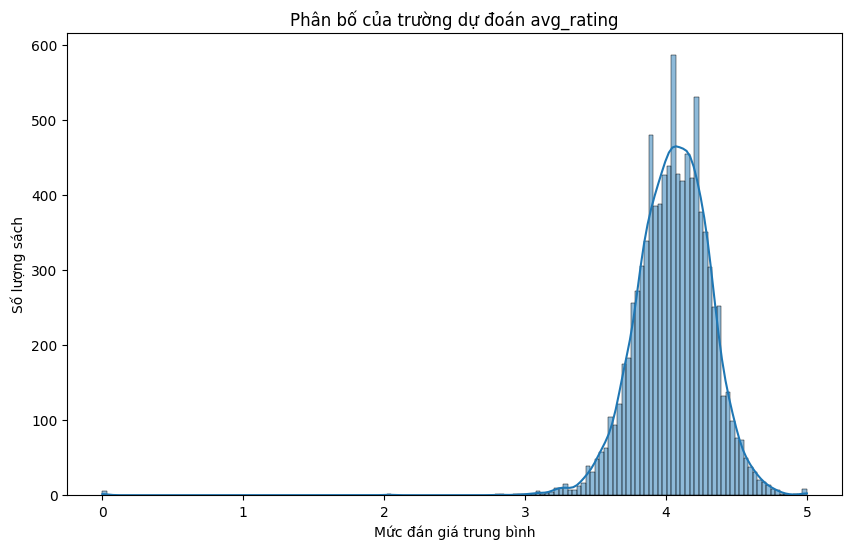

In [36]:
# Vẽ biểu đồ phân bố của biến 'avg_rating'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_ratings', kde=True)
plt.title('Phân bố của trường dự đoán avg_rating')
plt.xlabel('Mức đán giá trung bình')
plt.ylabel('Số lượng sách')
plt.show()

In [5]:
# mô tả các thống kê tổng quan về tập dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9999 non-null   object 
 1   author         9999 non-null   object 
 2   language       9788 non-null   object 
 3   avg_ratings    9999 non-null   float64
 4   ratings_count  9999 non-null   int64  
 5   reviews_count  9999 non-null   int64  
 6   publisher      9627 non-null   object 
 7   publish_year   9938 non-null   float64
 8   num_pages      9875 non-null   float64
 9   page_format    9955 non-null   object 
 10  genres         9999 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 859.4+ KB
None


## Thống kê mô tả

In [6]:
# thống kê mô tả trực quan về các đặc trưng
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avg_ratings,9999.0,4.056113,0.306140,0.0,3.89,4.07,4.24,5.0
ratings_count,9999.0,108232.086109,323965.095469,0.0,12428.50,32205.00,81873.50,9286858.0
reviews_count,9999.0,6188.436844,14837.381681,0.0,724.00,1943.00,5178.00,209826.0
publish_year,9938.0,2006.714933,88.727561,1.0,2003.00,2008.00,2013.00,9999.0
num_pages,9875.0,384.260354,290.222828,0.0,257.00,343.00,442.00,8258.0


### scatter plot về độ tương quan

- các điểm dữ liệu của năm xuất bản so với các biến khác chủ yếu là một đường nằm ngang thể hiện được sự tương quan yếu giữa biến publish year so với các biến khác cho thấy năm phát hành không ảnh hưởng tới các biến khác
- biến review count so với rating count thể hiện được sự tương quan dương
- các biến so với avg rating thể hiện sự tương quan dương nhưng khá mờ nhạt

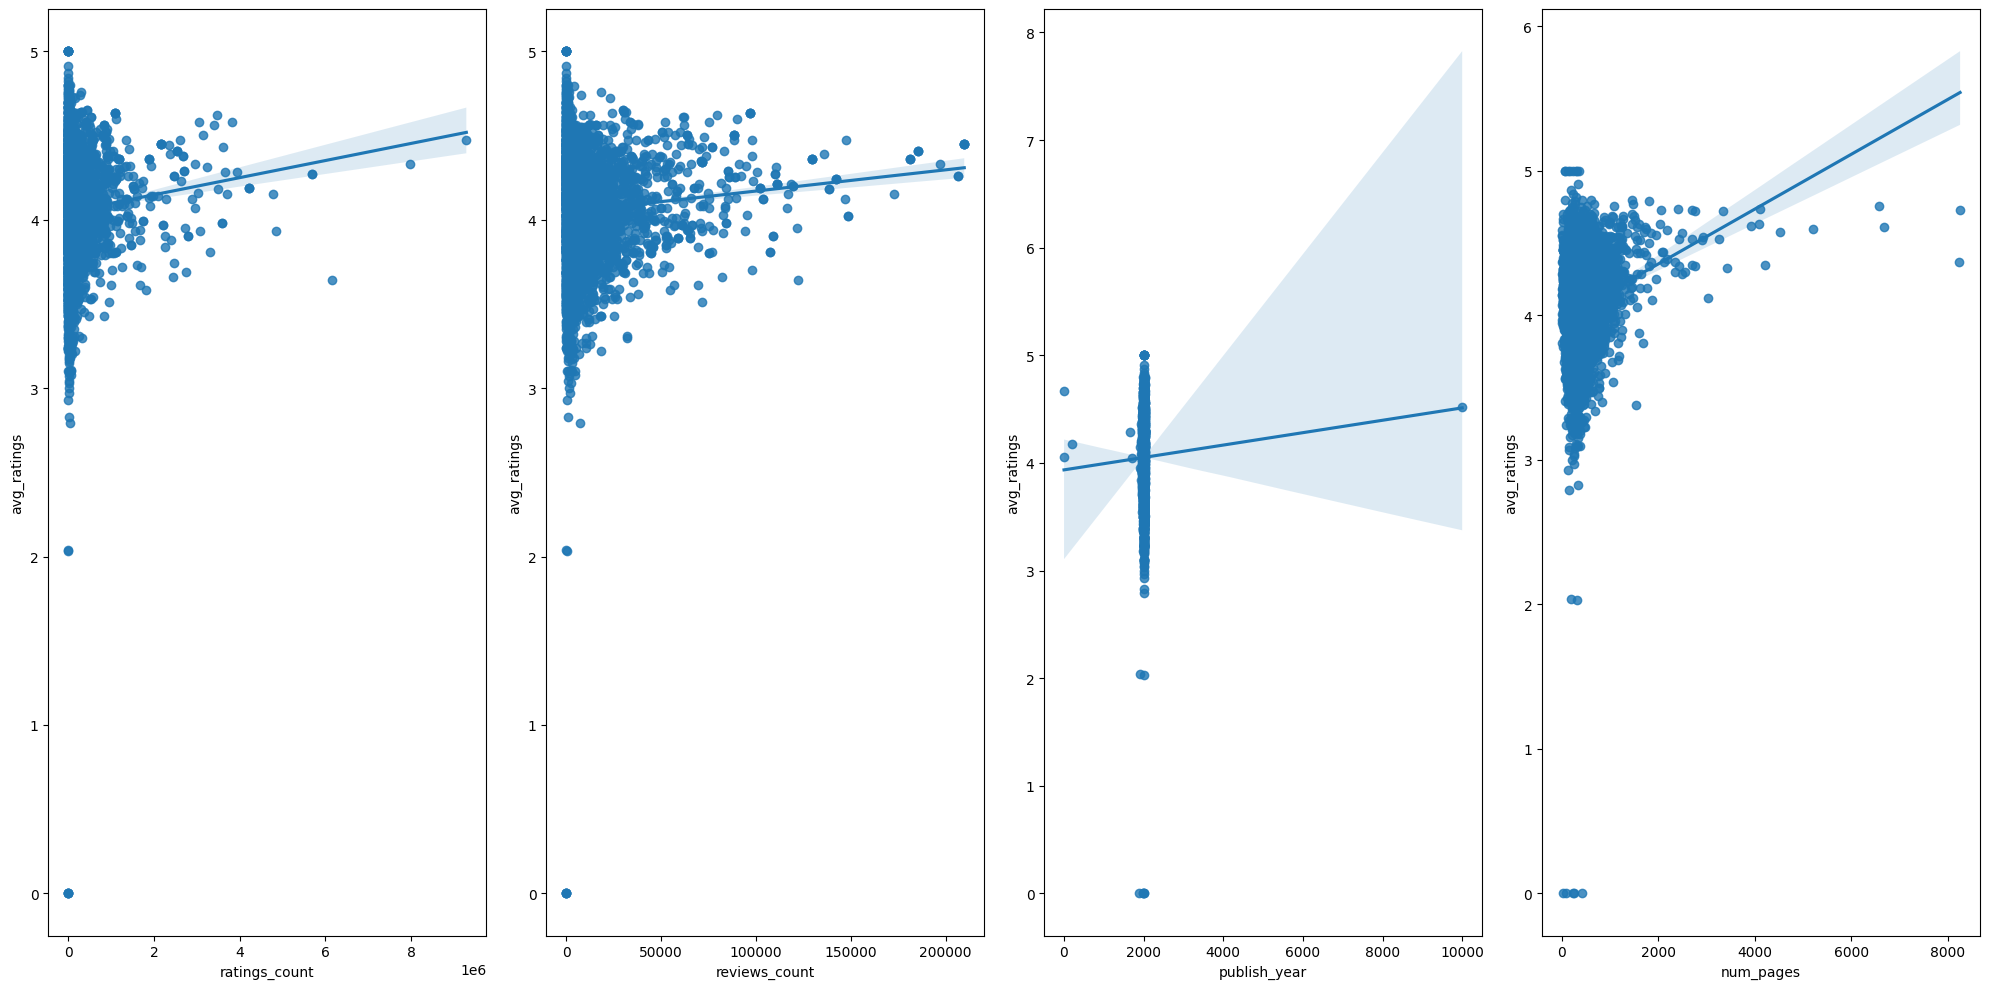

In [32]:
# fig, ax = plt.subplots(2, 2, figsize=(10,10))

# ax1 = plt.subplot(221)
# ax1 = sns.regplot(data=df, y='avg_ratings', x='ratings_count')
# ax2 = plt.subplot(222)
# ax2 = sns.regplot(data=df, y='avg_ratings', x='reviews_count')
# ax3 = plt.subplot(223)
# ax3 = sns.regplot(data=df, y='avg_ratings', x='publish_year')
# ax4 = plt.subplot(224)
# ax4 = sns.regplot(data=df, y='avg_ratings', x='num_pages')
# plt.tight_layout()

fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax1 = plt.subplot(141)
ax1 = sns.regplot(data=df, y='avg_ratings', x='ratings_count')
ax2 = plt.subplot(142)
ax2 = sns.regplot(data=df, y='avg_ratings', x='reviews_count')
ax3 = plt.subplot(143)
ax3 = sns.regplot(data=df, y='avg_ratings', x='publish_year')
ax4 = plt.subplot(144)
ax4 = sns.regplot(data=df, y='avg_ratings', x='num_pages')
plt.tight_layout()

- tất cả biếu đồ đề có sự tương quan dương giữa các biến với avg_ratings, tuy nhiên các biến có độ tương qua khá thấp với biến num_page có độ tương quan dương cao nhất

### box plot

In [8]:
def plotBox(data, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(20, 5))
    for col, ax in zip(columns, axes):
        ax.boxplot(data[col])
        ax.set_title(col)
    plt.show()

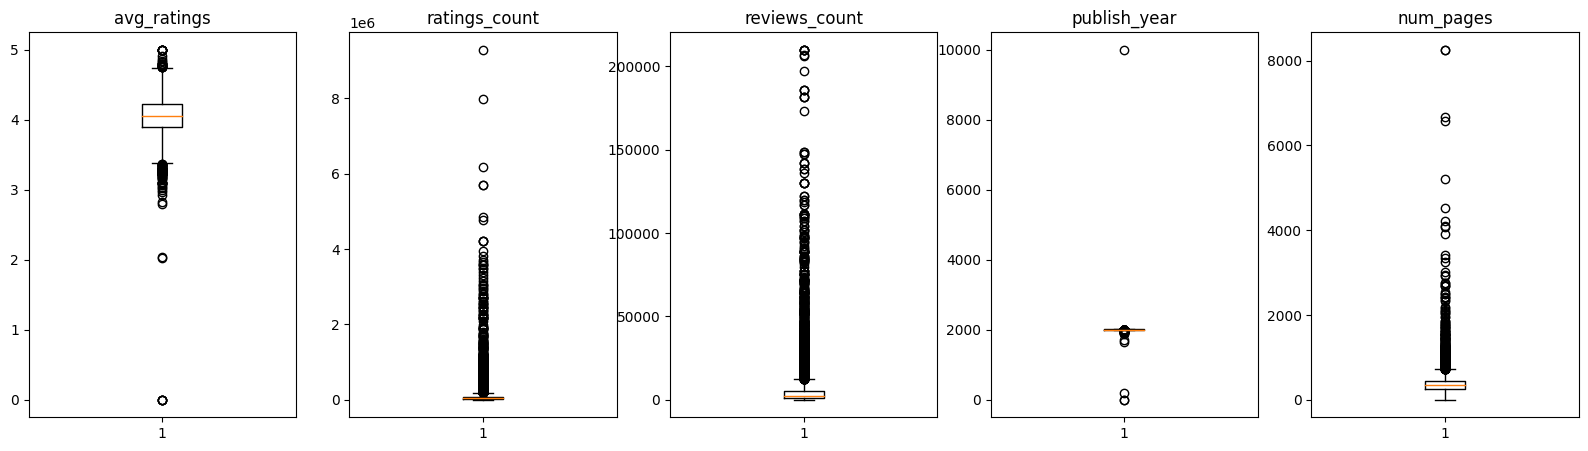

In [9]:
df.dropna(inplace=True)
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns
plotBox(df, numeric_columns)

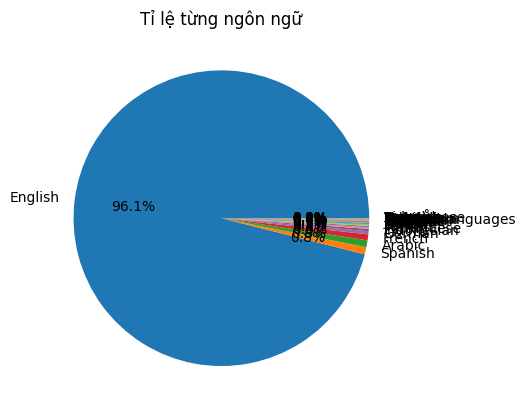

In [10]:
# Tạo danh sách các ngôn ngữ và số lượng tương ứng
languages = df['language'].value_counts().index.tolist()
counts = df['language'].value_counts().values.tolist()
# Vẽ biểu đồ tròn
plt.pie(counts, labels=languages, autopct='%1.1f%%')
# Đặt tiêu đề
plt.title("Tỉ lệ từng ngôn ngữ")
# Hiển thị biểu đồ
plt.show()

- ngôn ngữ Tiếng anh chiếm 95.8% cho thấy Tiếng anh

In [25]:
# tạo đặc trưng mới
df['count_books_by_language'] = df.groupby('language')['language'].transform('count')

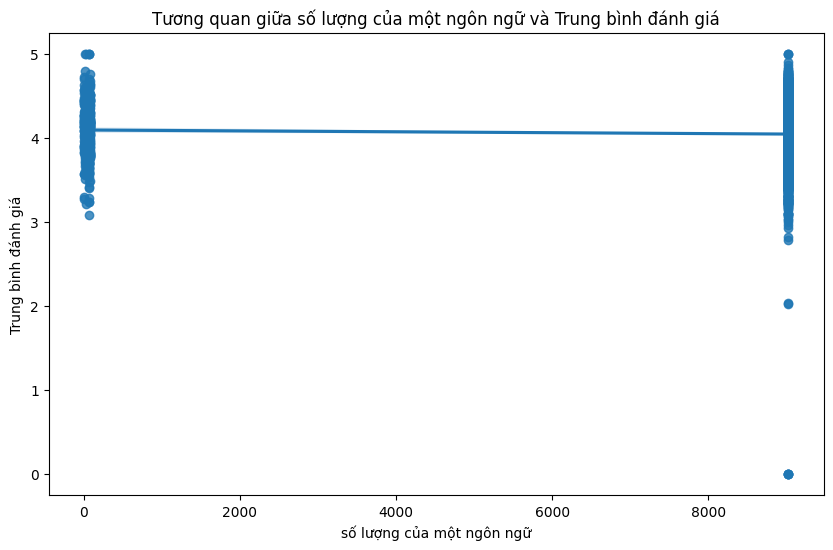

In [38]:
# Vẽ biểu đồ tương quan với sns.regplot()
plt.figure(figsize=(10, 6))
sns.regplot(data=df, y='avg_ratings', x='count_books_by_language')
plt.title('Tương quan giữa số lượng của một ngôn ngữ và Trung bình đánh giá')
plt.xlabel('số lượng của một ngôn ngữ')
plt.ylabel('Trung bình đánh giá')

plt.show()

In [11]:
book_counts = df['author'].value_counts()
print(book_counts)

Stephen King             61
Terry Pratchett          39
Rick Riordan             34
William Shakespeare      33
James Patterson          30
                         ..
Guy Sajer                 1
Dava Sobel                1
Elizabeth Goudge          1
Meg Rosoff                1
Jean-Jacques Rousseau     1
Name: author, Length: 4222, dtype: int64


In [12]:
# tạo đặc trưng mới
df['count_books_by_author'] = df.groupby('author')['author'].transform('count')


Thống kê kiểu chi để mấy cái này không còn quan trọng nữa title, genres, author, publisher, language

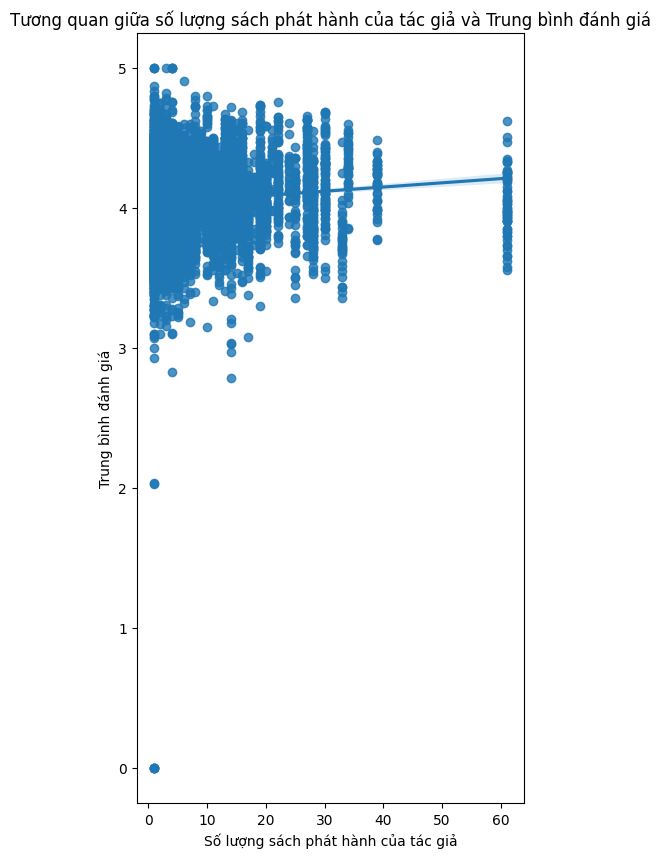

In [28]:

# Vẽ biểu đồ tương quan với sns.regplot()
plt.figure(figsize=(5, 10))
sns.regplot(data=df, y='avg_ratings', x='count_books_by_author')
plt.title('Tương quan giữa số lượng sách phát hành của tác giả và Trung bình đánh giá')
plt.xlabel('Số lượng sách phát hành của tác giả')
plt.ylabel('Trung bình đánh giá')

plt.show()